# Why numpy?
Let me put directly from numpy's documentation: 

Python lists are excellent, general-purpose containers. They can be “heterogeneous”, meaning that they can contain elements of a variety of types, and they are quite fast when used to perform individual operations on a handful of elements.

Depending on the characteristics of the data and the types of operations that need to be performed, other containers may be more appropriate; by exploiting these characteristics, we can improve speed, reduce memory consumption, and offer a high-level syntax for performing a variety of common processing tasks. NumPy shines when there are large quantities of “homogeneous” (same-type) data to be processed on the CPU.

This is a quick overview of arrays in NumPy. It demonstrates how n-dimensional (`ndarray`) arrays are represented and can be manipulated. In particular, if you don’t know how to apply common functions to n-dimensional arrays (without using for-loops), or if you want to understand axis and shape properties for n-dimensional arrays, this code examples might be of help.

**Q1. Why do we need to know NumPy?**

**Ans.** 
- NumPy (short for Numerical Python) is a package which is foundation for other libraries in python such as, tf, pandas, scipy, matplotlib, scikit-learn, etc
- NumPy is a fundamental package for scientific computing in python. It provides classes and functions for working with arrays, and a large collection of mathematical functions to operate/manipulate on these arrays.


##### Basics

In [2]:
# this is how you load numpy module in your project
import numpy as np 

NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of non-negative integers. In NumPy dimensions are called axes.

For example, the array for the coordinates of a point in 3D space, `[1, 2, 1]`, has one axis. That axis has 3 elements in it, so we say it has a length of 3. In the example pictured below, the array has 2 axes. The first axis has a length of 2, the second axis has a length of 3.
```python
[[1., 0., 0.],
 [0., 1., 2.]]
```


##### Array creation

There are several ways to create arrays.

For example, you can create an array from a regular Python `list` or `tuple` using the array function. The type of the resulting array is deduced from the type of the elements in the sequences.

In [3]:
# 1D array from list
py_list = [1, 2, 3, 4, 5]
array = np.array(py_list)
print(array)

[1 2 3 4 5]


In [4]:
print(type(array))

<class 'numpy.ndarray'>


In [5]:
# 2D array from lists
list_of_list = [[3,2,1],[1,2,3],[73,1,3]]
np.array(list_of_list)

array([[ 3,  2,  1],
       [ 1,  2,  3],
       [73,  1,  3]])

Note: python lists can contain many different data types, but Numpy arrays only contains a single data type (uses less space in memory).

In [7]:
# 3D arrays 
arr1_2d = np.array([[1,2,3],[4,5,6]])
arr2_2d = np.array([[7,8,9],[10,11,12]])
arr3_2d = np.array([[13,14,15],[16,17,18]])

arr_3d = np.array([arr1_2d, arr2_2d, arr3_2d])
print(arr_3d)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]]]


arrays with shape (5,) can be considered a row vector or a column vector. It is better to use `reshape` to make it explicit (e.g. row vector(1,5) or column vector (5,1)).


Matrix vs Tensor
- A matrix is a 2D array, a tensor is a n-dimensional array (n>2).

#### Shapeshifting
to know shape of array, use `shape` attribute

to change shape of array, use `reshape`, `flatten` method

In 2D array, axis 0 is vertical (rows), axis 1 is horizontal (columns)

In [8]:
# Flattening an array 
array = np.array([[1,2],[3,4],[8,2]])
array.flatten()

array([1, 2, 3, 4, 8, 2])

In [3]:
# Reshaping an array 
array = np.array([[1,2],[5,6],[8,7]])
array.reshape(2,3)

array([[1, 2, 5],
       [6, 8, 7]])

In [10]:
array.reshape(3,3)

ValueError: cannot reshape array of size 6 into shape (3,3)

- when you try to reshape array with incompatible shape

In [ ]:
array.transpose() # or array.T

array([[1, 5, 8],
       [2, 6, 7]])

#### Reversing array
NumPy’s `np.flip()` function allows you to flip, or reverse, the contents of an array along an axis. When using np.flip(), specify the array you would like to reverse and the axis. If you don’t specify the axis, NumPy will reverse the contents along all of the axes of your input array.

In [5]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])
reversed_arr = np.flip(arr)
print(reversed_arr)

[8 7 6 5 4 3 2 1]


In [6]:
arr_2d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
reversed_arr = np.flip(arr_2d)
print(reversed_arr)

[[12 11 10  9]
 [ 8  7  6  5]
 [ 4  3  2  1]]


In [7]:
reversed_arr_rows = np.flip(arr_2d, axis=0)
print(reversed_arr_rows)

[[ 9 10 11 12]
 [ 5  6  7  8]
 [ 1  2  3  4]]


In [8]:
reversed_arr_columns = np.flip(arr_2d, axis=1)
print(reversed_arr_columns)

[[ 4  3  2  1]
 [ 8  7  6  5]
 [12 11 10  9]]


You can also reverse the contents of only one column or row. For example, you can reverse the contents of the row at index position 1 (the second row):

In [9]:
arr_2d[1] = np.flip(arr_2d[1])
print(arr_2d)

[[ 1  2  3  4]
 [ 8  7  6  5]
 [ 9 10 11 12]]


In [10]:
arr_2d[:,1] = np.flip(arr_2d[:,1])
print(arr_2d)

[[ 1 10  3  4]
 [ 8  7  6  5]
 [ 9  2 11 12]]


#### Reshaping and flattening multidimensional arrays
There are two popular ways to flatten an array: `.flatten()` and `.ravel()`. The primary difference between the two is that the new array created using ravel() is actually a reference to the parent array (i.e., a “view”). This means that any changes to the new array will affect the parent array as well. Since ravel does not create a copy, it’s memory efficient.

In [11]:
x = np.array([[1 , 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
x.flatten()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

When you use flatten, changes to your new array won’t change the parent array.

In [12]:
a1 = x.flatten()
a1[0] = 99
print(x)  # Original array
print(a1)  # New array

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[99  2  3  4  5  6  7  8  9 10 11 12]


But when you use ravel, the changes you make to the new array will affect the parent array.

In [13]:
a2 = x.ravel()
a2[0] = 98
print(x)  # Original array
print(a2)  # New array

[[98  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[98  2  3  4  5  6  7  8  9 10 11 12]


#### How to access the docstring for more information

Python has a built-in `help()` function that can help you access this information. This means that nearly any time you need more information, you can use help() to quickly find the information that you need.

Because access to additional information is so useful, `IPython` uses the `?` character as a shorthand for accessing this documentation along with other relevant information.

You can reach another level of information by reading the source code of the object you’re interested in. Using a double question mark (`??`) allows you to access the source code.


In [14]:
help(max)

Help on built-in function max in module builtins:

max(...)
    max(iterable, *[, default=obj, key=func]) -> value
    max(arg1, arg2, *args, *[, key=func]) -> value
    
    With a single iterable argument, return its biggest item. The
    default keyword-only argument specifies an object to return if
    the provided iterable is empty.
    With two or more arguments, return the largest argument.



In [15]:
max?

Docstring:
max(iterable, *[, default=obj, key=func]) -> value
max(arg1, arg2, *args, *[, key=func]) -> value

With a single iterable argument, return its biggest item. The
default keyword-only argument specifies an object to return if
the provided iterable is empty.
With two or more arguments, return the largest argument.
Type:      builtin_function_or_method

In [16]:
a = np.array([1, 2, 3, 4, 5, 6])
a?

Type:        ndarray
String form: [1 2 3 4 5 6]
Length:      6
File:        ~/pjct/self-py/self-py/lib/python3.10/site-packages/numpy/__init__.py
Docstring:  
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level method (`ndarray(...)`) for instantiating an array.

For more information, refer to the `numpy` module and examine the
methods and attributes of an array.

Parameters
----------
(for the __new__ method; see Notes below)

shape : tuple of ints
    Shape of created array.
dtype : data-type, optional
    An

In [17]:
def double(a):
  '''Return a * 2'''
  return a * 2
double?

Signature: double(a)
Docstring: Return a * 2
File:      /tmp/ipykernel_6748/920213260.py
Type:      function

In [18]:
double??

Signature: double(a)
Source:   
def double(a):
  '''Return a * 2'''
  return a * 2
File:      /tmp/ipykernel_6748/920213260.py
Type:      function

If the object in question is compiled in a language other than Python, using ?? will return the same information as ?. You’ll find this with a lot of built-in objects and types, for example:

In [19]:
len?

Signature: len(obj, /)
Docstring: Return the number of items in a container.
Type:      builtin_function_or_method

In [20]:
len??

Signature: len(obj, /)
Docstring: Return the number of items in a container.
Type:      builtin_function_or_method

#### Working with mathematical formulas
The ease of implementing mathematical formulas that work on arrays is one of the things that make NumPy so widely used in the scientific Python community.

Here are a few examples:
- Calculate the sum of all elements in an array: `np.sum(array)`
- Calculate the mean of all elements in an array: `np.mean(array)`
- Calculate the standard deviation of all elements in an array: `np.std(array)`
- Calculate the variance of all elements in an array: `np.var(array)`
- Calculate the minimum value in an array: `np.min(array)`
- Calculate the maximum value in an array: `np.max(array)`
- Calculate the median of all elements in an array: `np.median(array)`
- Calculate the dot product of two arrays: `np.dot(array1, array2)`
- Calculate the cross product of two arrays: `np.cross(array1, array2)`
- Calculate the cumulative sum of elements in an array: `np.cumsum(array)`
- Calculate the cumulative product of elements in an array: `np.cumprod(array)`
- Calculate the inner product of two arrays: `np.inner(array1, array2)`
- Calculate the determinant of an array: `np.linalg.det(array)`
- Calculate the inverse of an array: `np.linalg.inv(array)`
- Calculate the trace of an array: `np.trace(array)`
- Calculate the eigenvalues and eigenvectors of an array: `np.linalg.eig(array)`
- Calculate the singular value decomposition of an array: `np.linalg.svd(array)`
- Calculate the matrix multiplication of two arrays: `np.matmul(array1, array2)`
- Calculate the element-wise multiplication of two arrays: `np.multiply(array1, array2)`
- Calculate the element-wise division of two arrays: `np.divide(array1, array2)`
- Calculate the element-wise addition of two arrays: `np.add(array1, array2)`
- Calculate the element-wise subtraction of two arrays: `np.subtract(array1, array2)`
- Calculate the element-wise exponentiation of an array: `np.exp(array)`
- Calculate the element-wise square root of an array: `np.sqrt(array)`
- Calculate the element-wise sine of an array: `np.sin(array)`
- Calculate the element-wise cosine of an array: `np.cos(array)`
- Calculate the element-wise tangent of an array: `np.tan(array)`
- Calculate the element-wise arcsine of an array: `np.arcsin(array)`
- Calculate the element-wise arccosine of an array: `np.arccos(array)`
- Calculate the element-wise arctangent of an array: `np.arctan(array)`
- Calculate the element-wise hyperbolic sine of an array: `np.sinh(array)`
- Calculate the element-wise hyperbolic cosine of an array: `np.cosh(array)`
- Calculate the element-wise hyperbolic tangent of an array: `np.tanh(array)`
- Calculate the element-wise inverse hyperbolic sine of an array: `np.arcsinh(array)`
- Calculate the element-wise inverse hyperbolic cosine of an array: `np.arccosh(array)`
- Calculate the element-wise inverse hyperbolic tangent of an array: `np.arctanh(array)`
- Calculate the element-wise logarithm of an array: `np.log(array)`
- Calculate the element-wise logarithm base 10 of an array: `np.log10(array)`
- Calculate the element-wise logarithm base 2 of an array: `np.log2(array)`
- Calculate the element-wise absolute value of an array: `np.abs(array)`
- Calculate the element-wise rounding of an array: `np.round(array)`
- Calculate the element-wise floor of an array: `np.floor(array)`
- Calculate the element-wise ceiling of an array: `np.ceil(array)`
- Calculate the element-wise sign of an array: `np.sign(array)`
- Calculate the element-wise modulo of an array: `np.mod(array1, array2)`
- Calculate the element-wise power of an array: `np.power(array1, array2)`
- Calculate the element-wise greatest common divisor of an array: `np.gcd(array1, array2)`
- Calculate the element-wise least common multiple of an array: `np.lcm(array1, array2)`
- Calculate the element-wise logical AND of two arrays: `np.logical_and(array1, array2)`
- Calculate the element-wise logical OR of two arrays: `np.logical_or(array1, array2)`
- Calculate the element-wise logical NOT of an array: `np.logical_not(array)`
- Calculate the element-wise logical XOR of two arrays: `np.logical_xor(array1, array2)`
- Calculate the element-wise bitwise AND of two arrays: `np.bitwise_and(array1, array2)`
- Calculate the element-wise bitwise OR of two arrays: `np.bitwise_or(array1, array2)`
- Calculate the element-wise bitwise NOT of an array: `np.bitwise_not(array)`
- Calculate the element-wise bitwise XOR of two arrays: `np.bitwise_xor(array1, array2)`
- Calculate the element-wise left shift of an array: `np.left_shift(array, shift)`
- Calculate the element-wise right shift of an array: `np.right_shift(array, shift)`
- Calculate the element-wise absolute difference of two arrays: `np.abs(array1 - array2)`
etc.

```python
# mean square error
n = len(array1)
error = (1/n)*`np.sum(`np.square(array1 - array2))
```
What makes this work so well is that predictions and labels can contain one or a thousand values. They only need to be the same size.

#### How to save and load NumPy objects

- `np.save`, `np.savez`, `np.savetxt`, `np.load`, `np.loadtxt`

You will, at some point, want to save your arrays to disk and load them back without having to re-run the code. Fortunately, there are several ways to save and load objects with NumPy. The ndarray objects can be saved to and loaded from the disk files with loadtxt and savetxt functions that handle normal text files, load and save functions that handle NumPy binary files with a `.npy` file extension, and a savez function that handles NumPy files with a `.npz` file extension.

The `.npy` and `.npz` files store data, shape, dtype, and other information required to reconstruct the ndarray in a way that allows the array to be correctly retrieved, even when the file is on another machine with different architecture.

If you want to store a single ndarray object, store it as a `.npy` file using `np.save`. If you want to store more than one ndarray object in a single file, save it as a `.npz` file using `np.savez`. You can also save several arrays into a single file in compressed npz format with `savez_compressed`.

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6])
np.save('filename', a) #saves as filename.npy

In [22]:
# reconstruct the array from the file
b = np.load('filename.npy')
b

array([1, 2, 3, 4, 5, 6])

You can save a NumPy array as a plain text file like a `.csv` or `.txt` file with np.savetxt.

In [23]:
csv_arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])
np.savetxt('new_file.csv', csv_arr)


In [24]:
np.loadtxt('new_file.csv')

array([1., 2., 3., 4., 5., 6., 7., 8.])

### Searching, sorting and counting
- `np.where()`, `np.sort()`, `np.argsort()`, `np.argmax()`, `np.argmin()`, `np.nonzero()`, `np.count_nonzero()`, `np.bincount()`, `np.searchsorted()`, `np.extract()`

In [ ]:
# example of np.where
array = np.array([1, 2, 3, 4, 5, 6, 7, 8])
result = np.where(array % 2 == 0)
print(result)

(array([1, 3, 5, 7]),)


In [27]:
# example of np.sort
array = np.array([3, 2, 1, 7, 4, 5])
array = array.reshape(2,3)
np.sort(array)

array([[1, 2, 3],
       [4, 5, 7]])

#### argsort()
The argsort() function is used to perform an indirect sort along the given axis using the algorithm specified by the kind keyword. It returns an array of indices of the same shape as a that index data along the given axis in sorted order.

In [30]:
import numpy as np
x = np.array([3, 1, 2])
idx = np.argsort(x)
print(idx)
print(x[idx])

[1 2 0]
[1 2 3]


In [31]:
x = np.array([[0, 3], [2, 2]])
print(x)
ind = np.argsort(x, axis=0)  # sorts along first axis (vertical axis/along rows)
print(ind)
y = np.take_along_axis(x, ind, axis=0)  # same as np.sort(x, axis=0)
print(y)

[[0 3]
 [2 2]]
[[0 1]
 [1 0]]
[[0 2]
 [2 3]]


In [32]:
ind = np.argsort(x, axis=1)  # sorts along last axis (across)
print(ind)
y = np.take_along_axis(x, ind, axis=1)  # same as np.sort(x, axis=1)
print(y)

[[0 1]
 [0 1]]
[[0 3]
 [2 2]]


#### argmax()
The argmax() function returns the indices of the maximum values along an axis. The axis parameter is optional. If it is not provided, the index is calculated along the flattened array.

In [33]:
import numpy as np
a = np.arange(6).reshape(2,3) + 10
print(a)
print(np.argmax(a))
print(np.argmax(a, axis=0))
print(np.argmax(a, axis=1))

[[10 11 12]
 [13 14 15]]
5
[1 1 1]
[2 2]


In [34]:
b = np.arange(6)
b[1] = 5
print(b)
print(np.argmax(b))  # Only the first occurrence is returned.

[0 5 2 3 4 5]
1


#### Numpy vs python data types
sample python data types
- int, float, str, list, tuple, dict, set, bool

sample numpy data types
- int8, int16, int32, int64, uint8, uint16, uint32, uint64, float16, float32, float64, complex64, complex128, bool, str, bytes, object

In [12]:
array = np.array([0, 1, 2, 3, 4, 5, 6, 7])
array.dtype

dtype('int64')

In [13]:
# Type conversions
array = np.array([1, 2, 3, 4, 5])
print(array.dtype)
array = array.astype(np.float64)
print(array.dtype)

int64
float64


### Type coersion
when you try to create an array with different data types, numpy will try to convert all elements to the same data type
- For example, if you try to create an array with integers and floats, numpy will convert all elements to floats.
- Adding an integer to an array of booleans will change all booleans in to integers.

### Broadcasting
When performing operations between arrays of different shapes, numpy automatically applies the broadcasting rule.

For example, consider two arrays:
```python
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
```
The shapes of the arrays are:
- a.shape = (3,)
- b.shape = (3,)
Since the arrays have the same shape, element-wise operations are performed. For example:
```python
a * b = [ 2.  4.  6.]
```
Broadcasting allows these types of binary operations to be performed on arrays of different sizes–for example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an array:
```python
a + 5 = [ 6.  7.  8.]
```
We can think of the scalar 5 being stretched during the operation into an array with the same shape as a so that the shapes are compatible for element-wise addition.

**Q2. What are the associated attributes and functions with numpy arrays?**

**Ans.** You don't have to worry about that, you can easily check them yourself, if you forget. Run `dir(array_name)`. 

In [3]:
# see attributes and methods
dir(array)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_namespace__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__

Some useful attributes

In [4]:
# shape
print(array.shape) # (5,)

# dtype
print(array.dtype) # data type 

# Note: Numpy supports some native data types such as int8, int16, int32, int64, uint8, uint16, uint32, uint64, float16, float32, float64, complex64, complex128
# along with other data types provided by python types such as bool, str, list, tuple, set, dict

# ndim
print(array.ndim) # number of dimensions

# size
print(array.size) # number of elements

# indexing
print(array[2])

# slicing
print(array[1:4]) # [start, end], end is exclusive

# reshape
print(array.reshape(5,1)) # 5 rows and 1 column

# itemsize
print(array.itemsize) # size (in bytes) of each element

# nbytes
print(array.nbytes) # total memory consumed by the array (in bytes)

(5,)
int64
1
5
3
[2 3 4]
[[1]
 [2]
 [3]
 [4]
 [5]]
8
40


`itemsize` and `nbytes` are very useful to know, specially for memory consumption.

**Q3. What will itemsize return when array have mixed type of elements?**

**Q4. What will nbytes return when array have mixed type of elements?**

I would like you to ponder about this. Please read the below example.

In [5]:
x = ["cat","dog"]
y = [2, 2.0]
z = [2, 3]
p = [3.0, 4.52]
q = ["hey", "kumaar"]
r = [1, 2.5, "hello"]
arrx = np.array(x)
arry = np.array(y)
arrz = np.array(z)
arrp = np.array(p)
arrq = np.array(q)
arrr = np.array(r)

print("for x")
print(arrx.itemsize)
print(arrx.nbytes)

print("for y")
print(arry.itemsize)
print(arry.nbytes)

print("for z")
print(arrz.itemsize)
print(arrz.nbytes)

print("for p")
print(arrp.itemsize)
print(arrp.nbytes)

print("for q")
print(arrq.itemsize)
print(arrq.nbytes)

print("for r")
print(arrr.itemsize)
print(arrr.nbytes)

for x
12
24
for y
8
16
for z
8
16
for p
8
16
for q
24
48
for r
128
384


The story is that, memory allocation is often dependent on your system architecture. In `NumPy`, arrays are optimized for memory efficiency by using a consistent data type (`dtype`) for all elements. When creating arrays with homogeneous data types like `int` or `float`, NumPy assigns each element a fixed number of bytes (e.g., 4 or 8 bytes per integer in `int32` or `int64` formats, respectively). This structure allows for contiguous memory allocation, efficient storage, and rapid access.

However, when arrays contain mixed data types (e.g., `int`, `float`, and `str`), NumPy defaults to a `dtype=object`. This means each element becomes a reference (or pointer) to a Python object rather than raw binary data, significantly increasing memory usage. On a 64-bit system, an object array may use between 64 and 128 bytes per element due to **pointer overhead, alignment, and metadata storage**. For instance, a mixed-type array like `[1, 2.5, "hello"]` will typically consume more memory per element than homogeneous arrays, as each element is an independent Python object requiring its own memory allocation.

Efficient memory use in NumPy is therefore achieved by **avoiding mixed-type arrays** and sticking to arrays with a single primitive data type when possible, as this ensures the array remains compact and computationally efficient.

##### Creating array when you don't know its element, but dimensions

NumPy offers several functions to create arrays with initial placeholder content. These minimize the necessity of growing arrays, an expensive operation.

- np.zeroes()
- np.random.random()
- np.arange()

By default, the dtype of the created array is `float64`, but it can be specified via the key word argument dtype.

In [7]:
# using zeros
np.zeros((2, 3), dtype=int)  # 2 rows and 3 columns fill with 0.

array([[0, 0, 0],
       [0, 0, 0]])

In [ ]:
np.random.random((2,4)) # 2 rows and 4 columns fill with random numbers between 0 and 1

array([[0.62236168, 0.08083366, 0.31432871, 0.77193502],
       [0.25674201, 0.93217143, 0.25345407, 0.89578726]])

In [8]:
# using ones
np.ones((2, 3, 4), dtype=np.int16) 

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

The code `np.ones((2, 3, 4), dtype=np.int16)` creates a 3-dimensional array filled with ones, shaped as `(2, 3, 4)` with a data type of `int16`.

To understand the structure, let’s move from the rightmost dimension to the left:

1. **Innermost Dimension (4)**: Start by creating an array with 4 elements, each set to `1`.
2. **Middle Dimension (3)**: Make 3 copies of this 4-element array, stacking them to form a `3x4` array.
3. **Outermost Dimension (2)**: Finally, create 2 copies of the `3x4` array, stacking them to form a `2x3x4` array.

So, the array will have 2 layers, each containing a `3x4` grid filled with `1`s.


In [9]:
# using empty (creates random elements depending upon the state of the memory)
np.empty((2, 3))

array([[4.84071476e-310, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

##### Sequential data generation

To create sequences of numbers, NumPy provides the `arange` function which is analogous to the Python built-in `range`, but returns an array.

In [10]:
np.arange(10, 30, 5) # create an array from 10 to 30 (exclusive) with step size of 5

array([10, 15, 20, 25])

In [11]:
np.arange(0, 2, 0.3) # supports float values

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

When `arange` is used with floating point arguments, it is generally not possible to predict the number of elements obtained, due to the finite floating point precision. For this reason, it is usually better to use the function `linspace` that receives as an argument the number of elements that we want, instead of the step:

In [12]:
np.linspace(0, 2, 9) # 9 numbers from 0 to 2

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [13]:
x = np.linspace(0, 2 * np.pi, 10) # useful to evaluate function at lots of points
f = np.sin(x)
print(f)

[ 0.00000000e+00  6.42787610e-01  9.84807753e-01  8.66025404e-01
  3.42020143e-01 -3.42020143e-01 -8.66025404e-01 -9.84807753e-01
 -6.42787610e-01 -2.44929360e-16]


##### Shape like array creation

``` python
numpy.zeros_like(a, dtype=None, order='K', subok=True, shape=None, *, device=None)```

Return an array of zeros with the same shape and type as a given array.

In [14]:
x = np.arange(6)
x = x.reshape((2, 3))
print(x)
y =np.zeros_like(x)
print(y)

[[0 1 2]
 [3 4 5]]
[[0 0 0]
 [0 0 0]]


``` python 
numpy.ones_like(a, dtype=None, order='K', subok=True, shape=None, *, device=None)
```
Return an array of ones with the same shape and type as a given array.

In [15]:
x = np.arange(6)
x = x.reshape((2, 3))
print(x)
y = np.ones_like(x) 
print(y)

[[0 1 2]
 [3 4 5]]
[[1 1 1]
 [1 1 1]]


```python 
numpy.empty_like(prototype, dtype=None, order='K', subok=True, shape=None, *, device=None)
``` 
Return a new array with the same shape and type as a given array.

In [16]:
a = ([1,2,3], [4,5,6])        # a is array-like
x = np.empty_like(a)
print(x)
a = np.array([[1., 2., 3.],[4.,5.,6.]])
y = np.empty_like(a)
print(y)

[[         23917511272                    0 -1792968743870853308]
 [     131913430271424      131913430299632 -5329836669818217850]]
[[4.9e-324 9.9e-324 1.5e-323]
 [2.0e-323 2.5e-323 3.0e-323]]


### Creating array from existing data
- slicing and indexing, `np.vstack()`, `np.hstack()`, `np.hsplit()`, `.view()`, `copy()`

In [20]:
a1 = np.array([[1, 1],
               [2, 2]])

a2 = np.array([[3, 3],
               [4, 4]])

np.vstack((a1, a2))


array([[1, 1],
       [2, 2],
       [3, 3],
       [4, 4]])

In [21]:
np.hstack((a1, a2))

array([[1, 1, 3, 3],
       [2, 2, 4, 4]])

You can use the `view` method to create a new array object that looks at the same data as the original array (a shallow copy).

Views are an important NumPy concept! NumPy functions, as well as operations like indexing and slicing, will return views whenever possible. This saves memory and is faster (no copy of the data has to be made). However it’s important to be aware of this - modifying data in a view also modifies the original array!

In [23]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

Now we create an array b1 by slicing a and modify the first element of b1. This will modify the corresponding element in a as well!

In [24]:
b1 = a[0, :]
print(b1)
b1[0] = 99
print(b1)
print(a)

[1 2 3 4]
[99  2  3  4]
[[99  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Using the `copy` method will make a complete copy of the array and its data (a deep copy).
`b2 = a.copy()`

##### Meshgrid generation  
`numpy.meshgrid`

This function supports both indexing conventions through the indexing keyword argument. Giving the string ‘ij’ returns a meshgrid with matrix indexing, while ‘xy’ returns a meshgrid with Cartesian indexing. In the 2-D case with inputs of length M and N, the outputs are of shape (N, M) for ‘xy’ indexing and (M, N) for ‘ij’ indexing. In the 3-D case with inputs of length M, N and P, outputs are of shape (N, M, P) for ‘xy’ indexing and (M, N, P) for ‘ij’ indexing. The difference is illustrated by the following code snippet:

In [27]:
# Unieque values
a = np.array([11, 11, 12, 13, 14, 15, 16, 17, 12, 13, 11, 14, 18, 19, 20])
unique_values = np.unique(a)
print(unique_values)

unique_values, indices_list = np.unique(a, return_index=True)
print(indices_list)

unique_values, occurrence_count = np.unique(a, return_counts=True)
print(occurrence_count)

[11 12 13 14 15 16 17 18 19 20]
[ 0  2  3  4  5  6  7 12 13 14]
[3 2 2 2 1 1 1 1 1 1]


In [28]:
a_2d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [1, 2, 3, 4]])
unique_rows = np.unique(a_2d, axis=0)
print(unique_rows)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [29]:
unique_rows, indices, occurrence_count = np.unique(
     a_2d, axis=0, return_counts=True, return_index=True)
print(unique_rows)
print(indices)
print(occurrence_count)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[0 1 2]
[2 1 1]


In [30]:
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
print(x) 
print(y)

[0.  0.5 1. ]
[0. 1.]


In [31]:
xv, yv = np.meshgrid(x, y, indexing='ij')
print("with ij indexing")
print(xv)
print(yv)
for i in range(nx):
    for j in range(ny):
        # treat xv[i,j], yv[i,j]
        pass

xv, yv = np.meshgrid(x, y, indexing='xy')
print("with xy indexing")
print(xv)
print(yv)
for i in range(nx):
    for j in range(ny):
        # treat xv[j,i], yv[j,i]
        pass 

with ij indexing
[[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]
[[0. 1.]
 [0. 1.]
 [0. 1.]]
with xy indexing
[[0.  0.5 1. ]
 [0.  0.5 1. ]]
[[0. 0. 0.]
 [1. 1. 1.]]


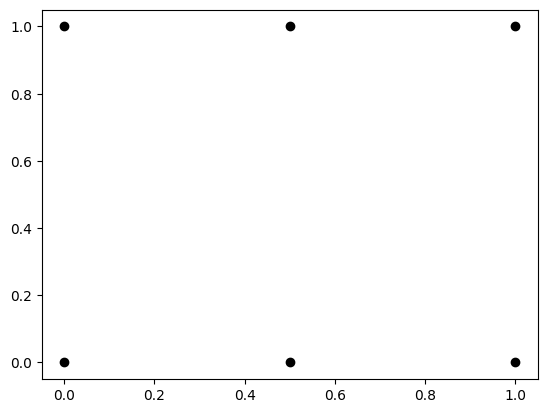

In [32]:
import matplotlib.pyplot as plt
plt.plot(xv, yv, marker='o', color='k', linestyle='none')
plt.show()

You can create sparse output arrays to save memory and computation time.

In [33]:
x = np.linspace(-5, 5, 101)
y = np.linspace(-5, 5, 101)
# full coordinate arrays
xx, yy = np.meshgrid(x, y)
zz = np.sqrt(xx**2 + yy**2)
print(xx.shape, yy.shape, zz.shape)
# sparse coordinate arrays
xs, ys = np.meshgrid(x, y, sparse=True)
zs = np.sqrt(xs**2 + ys**2)
print(xs.shape, ys.shape, zs.shape)
np.array_equal(zz, zs)

(101, 101) (101, 101) (101, 101)
(1, 101) (101, 1) (101, 101)


True

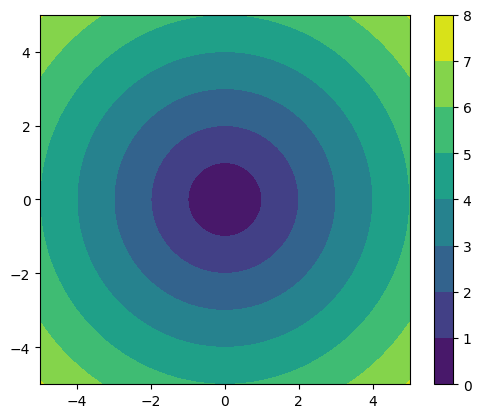

In [34]:
h = plt.contourf(x, y, zs)
plt.axis('scaled')
plt.colorbar()
plt.show()

##### Constants

NumPy includes several constants:
- numpy.e (euler constant)
- numpy.pi (pi)
- numpy.inf (infinity)
- numpy.nan (not a number)


##### Basic Operations

Arithmetic operators on arrays apply elementwise. A new array is created and filled with the result.

In [18]:
a = np.array([20, 30, 40, 50])
b = np.arange(4)
print(f"b: {b}")
c = a - b
print(f"c = a - b: {c}")
print(f"b^2: {b**2}")
print(10 * np.sin(a)) # multiply 10 to each element
print(a < 35) # check if each element is less than 35

b: [0 1 2 3]
c = a - b: [20 29 38 47]
b^2: [0 1 4 9]
[ 9.12945251 -9.88031624  7.4511316  -2.62374854]
[ True  True False False]


Unlike in many matrix languages, the product operator `*` operates elementwise in NumPy arrays. The matrix product can be performed using the `@` operator (in python >=3.5) or the `dot` function or method:

In [19]:
A = np.array([[1, 1],
              [0, 1]])
B = np.array([[2, 0],
              [3, 4]])
print(A * B)     # elementwise product
print(A @ B)     # matrix product
print(A.dot(B))  # another matrix product

[[2 0]
 [0 4]]
[[5 4]
 [3 4]]
[[5 4]
 [3 4]]


Some operations, such as `+=` and `*=`, act in place to modify an existing array rather than create a new one.

In [22]:
rg = np.random.default_rng(1)  # create instance of default random number generator
a = np.ones((2, 3), dtype=int)
b = rg.random((2, 3))
a *= 3
print(a)
b += a
print(b)
a += b  # b is not automatically converted to integer type

[[3 3 3]
 [3 3 3]]
[[3.51182162 3.9504637  3.14415961]
 [3.94864945 3.31183145 3.42332645]]


UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

When operating with arrays of different types, the type of the resulting array corresponds to the more general or precise one (a behavior known as upcasting).

In [24]:
a = np.ones(3, dtype=np.int32)
b = np.linspace(0, np.pi, 3)
b.dtype.name
c = a + b
print(c)
print(c.dtype.name)
d = np.exp(c * 1j)
print(d)
print(d.dtype.name)

[1.         2.57079633 4.14159265]
float64
[ 0.54030231+0.84147098j -0.84147098+0.54030231j -0.54030231-0.84147098j]
complex128


### Aggregate functions

Many unary operations, such as computing the sum of all the elements in the array, are implemented as methods of the ndarray class.

In [25]:
a = rg.random((2, 3))
print(a)
print(a.sum())
print(a.min())
print(a.max())

[[0.82770259 0.40919914 0.54959369]
 [0.02755911 0.75351311 0.53814331]]
3.1057109529998157
0.027559113243068367
0.8277025938204418


By default, many unary operations(e.g. sum of all elements of an array) apply to the array as though it were a list of numbers, regardless of its shape. However, by specifying the axis parameter you can apply an operation along the specified axis of an array:

In [27]:
b = np.arange(12).reshape(3, 4)
print(b)
print(b.sum(axis=0))           # sum of each column
print(b.min(axis=1))           # min of each row
print(b.cumsum(axis=1))        # cumulative sum along each row

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[12 15 18 21]
[0 4 8]
[[ 0  1  3  6]
 [ 4  9 15 22]
 [ 8 17 27 38]]


##### Universal functions

NumPy provides familiar mathematical functions such as sin, cos, and exp. In NumPy, these are called “universal functions” (`ufunc`). Within NumPy, these functions operate elementwise on an array, producing an array as output.

In [29]:
B = np.arange(3)
C = np.exp(B)
D = np.sqrt(B)
E = np.array([2., -1., 4.])
F = np.add(B, C)
print(B)
print(C)
print(D)
print(E)
print(F)

[0 1 2]
[1.         2.71828183 7.3890561 ]
[0.         1.         1.41421356]
[ 2. -1.  4.]
[1.         3.71828183 9.3890561 ]


Other functions:
- numpy.all (Test whether all array elements along a given axis evaluate to True.)
- numpy.any (Test whether any array element along a given axis evaluates to True.)
- numpy.argmax (Return the indices of the maximum values along an axis.)
- numpy.argmin (Return the indices of the minimum values along an axis.)
- numpy.argsort (Returns the indices that would sort an array.)
- numpy.isfinite (Test element-wise for finiteness (not infinity and not Not a Number).)
- numpy.isinf (Test element-wise for positive or negative infinity.)
- numpy.isnan (Test element-wise for NaN (Not a Number) and return result as a boolean array)

In [35]:
print(np.all([[True,False],[True,True]]))
print(np.all([[True,False],[True,True]], axis=0))
print(np.all([-1, 4, 5]))
print(np.all([1.0, np.nan]))

False
[ True False]
True
True


In [36]:
print(np.any([[True, False], [True, True]]))
print(np.any([[True,  False, True ],
        [False, False, False]], axis=0))
print(np.any([-1, 0, 5]))

True
[ True False  True]
True


In [38]:
print(
np.isfinite(1),
np.isfinite(0),
np.isfinite(np.nan),
np.isfinite(np.inf),
np.isfinite(-np.inf),
np.isfinite([np.log(-1.),1.,np.log(0)]))

True True False False False [False  True False]


/tmp/ipykernel_28186/1417982119.py:7: RuntimeWarning: invalid value encountered in log
  np.isfinite([np.log(-1.),1.,np.log(0)]))
/tmp/ipykernel_28186/1417982119.py:7: RuntimeWarning: divide by zero encountered in log
  np.isfinite([np.log(-1.),1.,np.log(0)]))


In [39]:
print(
np.isnan(np.nan),
np.isnan(np.inf),
np.isnan([np.log(-1.),1.,np.log(0)]))

True False [ True False False]


/tmp/ipykernel_28186/803577518.py:4: RuntimeWarning: invalid value encountered in log
  np.isnan([np.log(-1.),1.,np.log(0)]))
/tmp/ipykernel_28186/803577518.py:4: RuntimeWarning: divide by zero encountered in log
  np.isnan([np.log(-1.),1.,np.log(0)]))


In [4]:
# concatenation 

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.concatenate([a, b])
print(a.shape)
print(c)
print(c.shape)

(3,)
[1 2 3 4 5 6]
(6,)


In [10]:
a = np.array([[2,3],[1,5]])
b = np.array([[6,7],[9,8]])
c = np.concatenate([a,b], axis=0)
d = np.concatenate([a,b], axis=1)
print(c.shape)
print(c)
print(d.shape)
print(d)


(4, 2)
[[2 3]
 [1 5]
 [6 7]
 [9 8]]
(2, 4)
[[2 3 6 7]
 [1 5 9 8]]


### Sorting

In [ ]:
array = np.array([[3,2,1],[7,2,1],[1,2,3]])
print(np.sort(array))
print()
print(np.sort(array, axis=0)) # sorts along the vertical axis (rows)
print()
print(np.sort(array, axis=1)) # sorts along the horizontal axis (columns)

[[1 2 3]
 [1 2 7]
 [1 2 3]]

[[1 2 1]
 [3 2 1]
 [7 2 3]]

[[1 2 3]
 [1 2 7]
 [1 2 3]]


### Filtering arrays

Two ways:
- Masks and fancy indexing 
- `np.where()`

##### Boolean masks

In [ ]:
arr = np.arange(1,6)
arr

array([1, 2, 3, 4, 5])

In [ ]:
mask = arr % 2 == 0
print(mask)
print(arr[mask]) # fancy indexing


[False  True False  True False]
[2 4]


[2 4]
